# IBM MACHINE LEARNING - PROJECT E

## MRI brain Tumor Classification via Convolutional Neural Network

### 1 - General Information about the dataset
**The training set encompasses 3,000 MRI images, 50% of them is a tumor image.** <br>
**The data set has been collected from kaggle, 'Br35H :: Brain Tumor Detection 2020'**

https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

### 2 - Analysis Object

**A - To build a CNN model that classify brain tumors.**<br>
**B - To build an interactive dashbaord for the model.**

In [1]:
import os # To access directory
import cv2 # To read images
from PIL import Image # To read images
import numpy as np # To access arrays
import tensorflow as tf # To access deep learning
from  tensorflow import keras # To access Keras API
from keras.utils import normalize # To normalize data
from keras.models import Sequential # To use sequential API
from keras.layers import Conv2D, MaxPooling2D # To use CNN
from keras.layers import Activation, Dropout, Flatten, Dense # To use NN
# from keras.utils import to_categorical # Just in case we need to do multiclass classification
import matplotlib.pyplot as plt # To plot
import seaborn as sns # To plot
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score # accuracy metrics


os.chdir('/users/salahkaf/BrainClass/')
image_directory='datasets/' # Image folder
no_tumor_images = os.listdir(image_directory+'no/')
yes_tumor_images = os.listdir(image_directory+'yes/')

In [2]:
##Checking how to take the images names
path = 'no0.jpg'
print(path.split('.')[1]) # Printing the '.jpg'

jpg


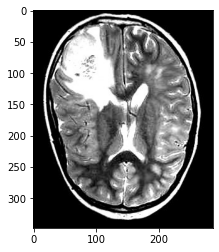

In [3]:
# PLotting a sample image
image = cv2.imread('/Users/salahkaf/BrainClass/datasets/yes/y0.jpg') # Read the image
plt.imshow(image) # print the image

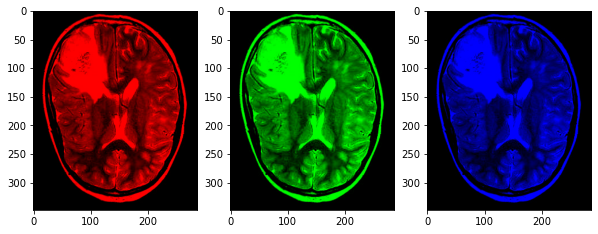

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
red_image = image.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

green_image = image.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

blue_image = image.copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

axes[0].imshow(red_image)
axes[1].imshow(green_image)
axes[2].imshow(blue_image)

### 3 - Save the Images as Numpy Arrays

In [5]:
dataset =[] # Empty list that will hold the images array
label = [] # 1 or 0.
INPUT_SIZE = 64 

##Reading the 'no' images
for i, image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'): # Read only jpg images
        image = cv2.imread(image_directory+'no/'+image_name) # Read the image
        image = Image.fromarray(image,'RGB') # Convert it [RGB array]
        image = image.resize((INPUT_SIZE,INPUT_SIZE)) # Resizing images to have a unified size (64 by 64)
        dataset.append(np.array(image)) #append arrays to dataset
        label.append(0)

##Reading the 'yes'images
for i, image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'): # Read only jpg images
        image = cv2.imread(image_directory+'yes/'+image_name)  # Read the image
        image = Image.fromarray(image,'RGB') # Convert it [RGB array]
        image = image.resize((INPUT_SIZE,INPUT_SIZE)) # Resizing images to have a unified size
        dataset.append(np.array(image)) # append arrays to dataset
        label.append(1)

##Checking the length of the lists
print(len(dataset))
print(len(label))

##Converting lists into arrays
dataset = np.array(dataset) # X
label = np.array(label) # Y

3000
3000


In [6]:
##Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state=0)

print(X_train.shape) # (2400, 64, 64, 3)
print(y_train.shape) # (2400,)
print(X_test.shape) #(600 ,64, 64, 3)
print(y_test.shape) #(600,)

(2400, 64, 64, 3)
(2400,)
(600, 64, 64, 3)
(600,)


1


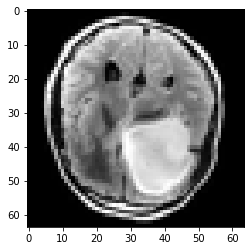

In [7]:
## Let's look at one of the images after scaling
print(y_train[444]) # print the class of the image
plt.imshow(X_train[444]); # print the image

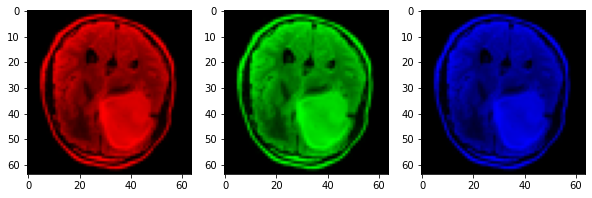

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

red_image = X_train[444].copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

green_image = X_train[444].copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

blue_image = X_train[444].copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

axes[0].imshow(red_image)
axes[1].imshow(green_image)
axes[2].imshow(blue_image)

### 4 - Building the CNN Model

In [9]:
##Normalizing X sets
X_train = normalize(X_train, axis = 1)
X_test = normalize(X_test, axis = 1)

##The below code for multiclass classification
# y_train = to_categorical(y_train, num_classes =)
# y_test = to_cetegorical(y_test,num_classes=)
# with this we sue cross_entropy

##Model Building
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape =(INPUT_SIZE,INPUT_SIZE,3))) # 32 filter, #3 by 3 kernel
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform')) # 32 filter, #3 by 3 kernel
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform')) # 64 filter, #3 by 3 kernel
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))


model.add(Flatten()) # moving from 3 dimensional object to 1 dimensional object.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) # adding final dense layer, so our output is equal to number of classes we have.
model.add(Activation('sigmoid')) # Sigmoid as we are doing binary cross entropy # categorical cross entropy >> use softmax
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

2022-08-10 00:22:59.177405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 activation_2 (Activation)   (None, 12, 12, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                147520    
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
          

In [10]:
##compiling and fitting
batch_size = 32
# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy', # binary cross entropy because it is a binary classification
              optimizer='adam',
              metrics=['accuracy'])
run_hist = model.fit(X_train, y_train,
              batch_size=batch_size, # how many rows [image] per iteration
              epochs=10,
              validation_data=(X_test, y_test),
              shuffle=True,
              verbose = 1)

# model.save('BrainTumor10Epochs.h5')

Epoch 1/10
75/75 [==============================] - 8s 105ms/step - loss: 0.5763 - accuracy: 0.7013 - val_loss: 0.4931 - val_accuracy: 0.7483
Epoch 2/10
75/75 [==============================] - 8s 102ms/step - loss: 0.4653 - accuracy: 0.7975 - val_loss: 0.4111 - val_accuracy: 0.8183
Epoch 3/10
75/75 [==============================] - 9s 114ms/step - loss: 0.3790 - accuracy: 0.8350 - val_loss: 0.3553 - val_accuracy: 0.8183
Epoch 4/10
75/75 [==============================] - 8s 106ms/step - loss: 0.3129 - accuracy: 0.8650 - val_loss: 0.2972 - val_accuracy: 0.8800
Epoch 5/10
75/75 [==============================] - 8s 113ms/step - loss: 0.2655 - accuracy: 0.8904 - val_loss: 0.2496 - val_accuracy: 0.8983
Epoch 6/10
75/75 [==============================] - 8s 106ms/step - loss: 0.1959 - accuracy: 0.9229 - val_loss: 0.1989 - val_accuracy: 0.9317
Epoch 7/10
75/75 [==============================] - 8s 106ms/step - loss: 0.1495 - accuracy: 0.9471 - val_loss: 0.1647 - val_accuracy: 0.9433
Epoch 

### 5 - Evaluate Model accuracy

Text(0.5, 1.0, 'Accuracy over iterations')

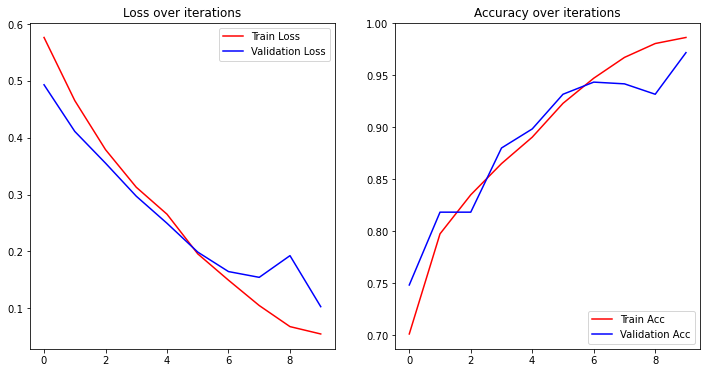

In [11]:
n = len(run_hist.history["loss"])

fig = plt.figure(figsize=(12, 6)) # Initiate the figure 
ax = fig.add_subplot(1, 2, 1) # bounding box 1 
ax.plot(range(n), (run_hist.history["loss"]),'r', label="Train Loss")
ax.plot(range(n), (run_hist.history["val_loss"]),'b', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)  # bounding box 2
ax.plot(range(n), (run_hist.history["accuracy"]),'r', label="Train Acc")
ax.plot(range(n), (run_hist.history["val_accuracy"]),'b', label="Validation Acc")

ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

In [12]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred) 
    # fpr = [1 - Specificity] i.e., false positive rate or [1 - True Negative Rate]
    # tpr = true positive rate [sensitivity]
    #thr= threshold
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-') # plotting the receiver operating characteristic 
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on MRI Brain Tumor via CNN'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

19/19 [==============================] - 1s 28ms/step

accuracy is 0.972
roc-auc is 0.992


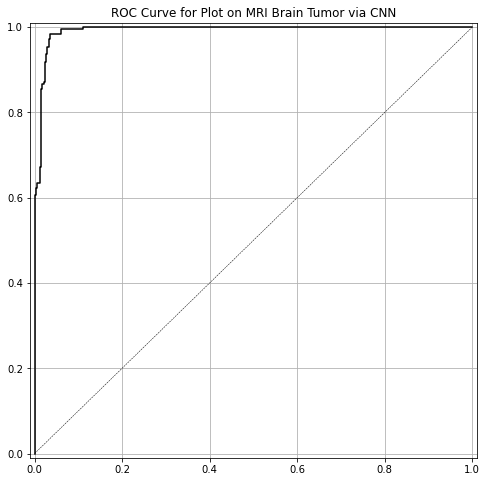

In [13]:
y_pred_class = (model.predict(X_test) >= 0.5).astype(int)
y_pred_prob = model.predict(X_test)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'Plot')


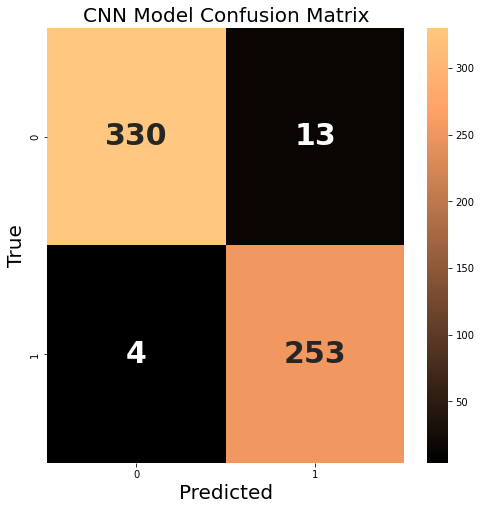

In [14]:
cm = confusion_matrix(y_test, y_pred_class)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d',  cmap='copper', annot_kws={"size": 30, "weight": "bold"})


ax.set_title("CNN Model Confusion Matrix",fontsize=20);
ax.set_xlabel('Predicted', fontsize=20);
ax.set_ylabel('True', fontsize=20);

### 6 - Conclusion
**In this capstone project, we used the CNN model to do a binary classification of MRI brain tumors. The CNN model used 3 convolution layers all of which are 3 by 3 kernels and it has been trained through 10 epochs. The model scored an accuracy of 97% in the evaluation set.** 